## Dev parameters

In [1]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-12 13:40:50.429247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 13:40:50.476442: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 13:40:50.477298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 13:40:51.442486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [2]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [3]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


In [4]:
pd.DataFrame(val_set.filenames)

,0
0,0_utilizavel/utiliza (1).jpeg
1,0_utilizavel/utiliza (10).jpeg
2,0_utilizavel/utiliza (100).jpeg
3,0_utilizavel/utiliza (101).jpeg
4,0_utilizavel/utiliza (102).jpeg
...,...
217,1_defeituoso/defeito (215).jpeg
218,1_defeituoso/defeito (216).jpeg
219,1_defeituoso/defeito (217).jpeg
220,1_defeituoso/defeito (218).jpeg


# BUILD

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 8)         0

# TRAIN

In [6]:
trainer.training_loop()

2023/08/12 13:40:54 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/12 13:40:54 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40
56/56 - 7s - loss: 0.6472 - recall: 0.9328 - binary_accuracy: 0.6143 - precision: 0.6188 - false_negatives: 36.0000 - false_positives: 308.0000 - val_loss: 0.6117 - val_recall: 0.8284 - val_binary_accuracy: 0.7072 - val_precision: 0.7255 - val_false_negatives: 23.0000 - val_false_positives: 42.0000 - 7s/epoch - 125ms/step
Epoch 2/40


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 4s - loss: 0.5791 - recall: 0.8004 - binary_accuracy: 0.6973 - precision: 0.7247 - false_negatives: 107.0000 - false_positives: 163.0000 - val_loss: 0.5910 - val_recall: 0.8209 - val_binary_accuracy: 0.6847 - val_precision: 0.7051 - val_false_negatives: 24.0000 - val_false_positives: 46.0000 - 4s/epoch - 65ms/step
Epoch 3/40
56/56 - 4s - loss: 0.5537 - recall: 0.8097 - binary_accuracy: 0.7298 - precision: 0.7574 - false_negatives: 102.0000 - false_positives: 139.0000 - val_loss: 0.5662 - val_recall: 0.7761 - val_binary_accuracy: 0.7027 - val_precision: 0.7429 - val_false_negatives: 30.0000 - val_false_positives: 36.0000 - 4s/epoch - 66ms/step
Epoch 4/40
56/56 - 5s - loss: 0.5334 - recall: 0.8041 - binary_accuracy: 0.7478 - precision: 0.7822 - false_negatives: 105.0000 - false_positives: 120.0000 - val_loss: 0.5492 - val_recall: 0.7463 - val_binary_accuracy: 0.7387 - val_precision: 0.8065 - val_false_negatives: 34.0000 - val_false_positives: 24.0000 - 5s/epoch - 97ms/step
Epoch 

2023/08/12 13:43:45 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/12 13:43:45 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpqfr11qbw/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpqfr11qbw/model/data/model/assets


# LOAD MODEL TRAINED

In [7]:
trainer.load_model_trained()

# REPRODUCIBLE RESULTS EVALUATION

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


In [9]:
pd.DataFrame(val_set.filenames)

,0
0,0_utilizavel/utiliza (1).jpeg
1,0_utilizavel/utiliza (10).jpeg
2,0_utilizavel/utiliza (100).jpeg
3,0_utilizavel/utiliza (101).jpeg
4,0_utilizavel/utiliza (102).jpeg
...,...
217,1_defeituoso/defeito (215).jpeg
218,1_defeituoso/defeito (216).jpeg
219,1_defeituoso/defeito (217).jpeg
220,1_defeituoso/defeito (218).jpeg


# EVALUATE RESULTS

56/56 [==============================] - 3s 44ms/step
Confusion matrix Train 
 [[331  25]
 [ 11 525]]
56/56 [==============================] - 2s 32ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (18).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (224).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (227).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (253).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (289).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (314).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (325).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (329).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (333).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (334).jpeg', '../dat

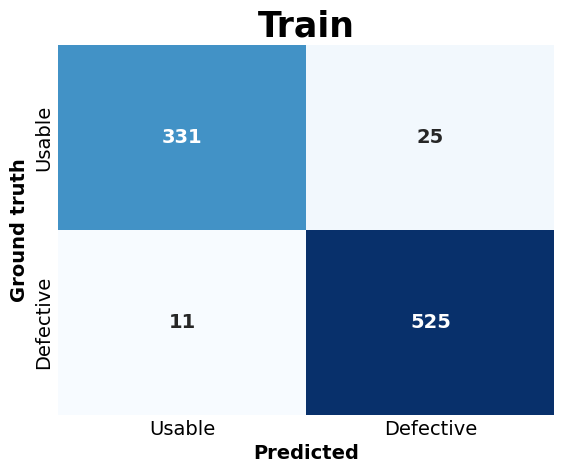

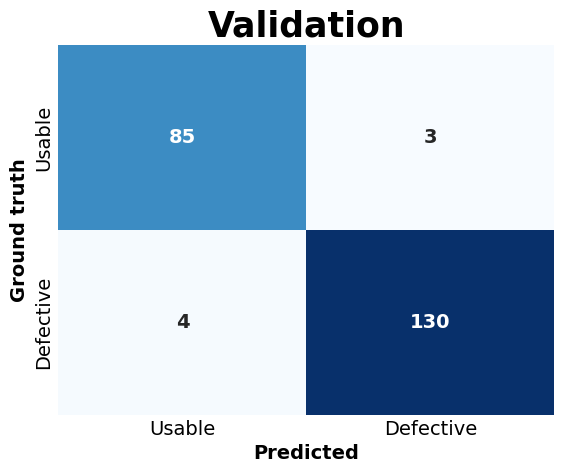

In [10]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name)
    trainer.get_errors(set, name, draw_errors=True)

# END LOGGER RUN

In [11]:
trainer.end_run()